<a href="https://colab.research.google.com/github/arodcru/arodcru/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Passo 1: Importar Bibliotecas e Carregar Dados
import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar conjunto de dados Iris
iris = load_iris()
X = iris.data   # features
y = iris.target # rótulos (0, 1 ou 2 -> 3 tipos de flores)

In [2]:
# Passo 2: Pré-processamento dos Dados
# Dividir dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados (muito importante para redes neurais)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Passo 3: Construir o Modelo (Rede Neural Simples)
# Sequential -> modelo linear (camada após camada)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)), # 1ª camada oculta
    tf.keras.layers.Dense(8, activation='relu'),  # 2ª camada oculta
    tf.keras.layers.Dense(3, activation='softmax') # Camada de saída (3 classes)
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Passo 4: Treinar o Modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


In [ ]:
# Passo 5: Avaliar o Modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {accuracy*100:.2f}%")


In [7]:
# Passo 6: Fazer Previsões
predictions = model.predict(X_test)

# As previsões vêm em probabilidades, vamos converter para a classe
predicted_classes = predictions.argmax(axis=1)

print("Classes previstas:", predicted_classes[:10])
print("Classes reais:   ", y_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Classes previstas: [2 0 2 2 2 0 1 2 1 1]
Classes reais:    [1 0 2 1 1 0 1 2 1 1]


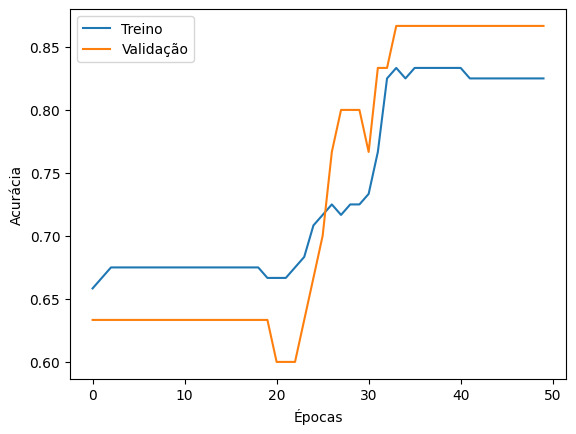

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()